In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from utils import plot_2d, plot_classifier_boundary, test_model
from sklearn.model_selection import GridSearchCV

# LINEAR performing better

In [2]:
#features between 1700-2300



def G_SVC_linear():

    X,y = datasets.make_classification(n_samples=100, n_features=1748,
                                       n_clusters_per_class=1,
                                       n_redundant=0,
                                       class_sep=2,
                                       random_state=42)
    
    return X, y

In [3]:
X_lin, y_lin = G_SVC_linear()
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=.33, random_state=42)
model_linear = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
model_rbf = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)

print(model_linear.score(X_test, y_test) * 100)
print(model_rbf.score(X_test, y_test) * 100)

87.87878787878788
57.57575757575758


In [51]:
param_grid = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100],
              'kernel': ['linear']}


grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'kernel': ['linear']})

In [52]:
grid.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [39]:
param_grid = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100],
              'kernel': ['rbf'],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10]}


grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7,
                                   10],
                         'kernel': ['rbf']})

In [40]:
grid.best_params_

{'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}

In [53]:
X_lin, y_lin = G_SVC_linear()
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=.33, random_state=42)
model_linear = SVC(kernel='linear', random_state=42, C=0.001).fit(X_train, y_train)
model_rbf = SVC(kernel='rbf', C=5, gamma=0.0001, random_state=42).fit(X_train, y_train)

In [54]:

print(model_linear.score(X_test, y_test) * 100)
print(model_rbf.score(X_test, y_test) * 100)

87.87878787878788
87.87878787878788


In [49]:
test_model(model_linear, X_lin, y_lin)

AUC score: 0.736
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


In [50]:
test_model(model_rbf, X_lin, y_lin)

AUC score: 0.713
The classifier boundary can't be plotted because the dataset has more than 2 dimensions


# RBF performing better

In [58]:
def G_SVC_RBF():
    
    X, y = datasets.make_circles(n_samples=1000,
                                 noise=0.5,
                                 factor=0.7,
                                 random_state=42)
    
    return X, y

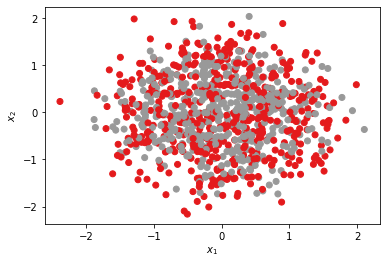

In [59]:
X_rbf, y_rbf = G_SVC_RBF()

plot_2d(X_rbf, y_rbf)

In [57]:
param_grid = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100],
              'kernel': ['linear']}


grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'kernel': ['linear']})

In [ ]:
grid.best_params_

In [ ]:
param_grid = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100],
              'kernel': ['rbf'],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10]}


grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rbf, y_rbf, test_size=.33, random_state=42)
model_linear = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
model_rbf = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)

In [60]:
model_linear.score(X_test, y_test) * 100


87.87878787878788

In [61]:
model_rbf.score(X_test, y_test) * 100

87.87878787878788

In [62]:
plot_classifier_boundary(model_rbf, X_rbf, y_rbf)

ValueError: X has 2 features, but SVC is expecting 1748 features as input.

In [63]:
plot_classifier_boundary(model_linear, X_rbf, y_rbf)

ValueError: X has 2 features, but SVC is expecting 1748 features as input.

In [ ]:
test_model(model_linear, X_rbf, y_rbf)

In [ ]:
test_model(model_rbf, X_rbf, y_rbf)